# Support Vector Machines

In [14]:
import sklearn
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

## Load a Simulated Dataset

In [ ]:
df = pd.read_csv('X.csv')
X = df.values
df = pd.read_csv('Y.csv')
Y = df.values
Y = Y.flatten()
plt.scatter(X[:, 0], X[:, 1], c=Y);

In this session, we will explore the above dataset with Support Vector Machines (SVMs). As tools of classification, SVMs will be used to predict the label of previously unseen points. Looking at the visulization of this dataset, we see that there are 2 clusters of data points (one in a boomerang shape on the left and another in a straight line that points into the boomerang). While there are these 2 clusters, there is significant overlap between them where they meet up. This overlap makes these datasets intereting for SVMs.

## Sklearn SVMs

Sklearn has a great library for SVMs. There are a number of different implementations of SVMs by Sklearn, and in this session we will be using Sklearn.svm.SVC. This is a good implementation because it is very flexible with the use of kernels and multiclass classification problems. It scales well for problems with up to 10,000 data points. SVC sets the default kernel to 'rbf' but we will begin by using a 'linear' kernel. More information on Sklearn.svm.SVC can be found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Additional information on classifiers provided in the Sklearn library can be found at https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm and https://scikit-learn.org/stable/modules/svm.html#svm

## Initial SVM with Linear Kernel

Here we are loading all of our data into an SVM to see what decision boundary will be created. Usually, when creating an model it is important to partition the data in order to have some method for model validation, but in this case since we are using 2 dimensional data we will be able to visually inspect the decision boundary. Later on, when we use SVMs to make predictions, we will partition the data.

In [46]:
model = svm.SVC(kernel='linear')
model.fit(X,Y)

SVC(kernel='linear')

The next cell of code shows the decision boundary formed by the model we just created.

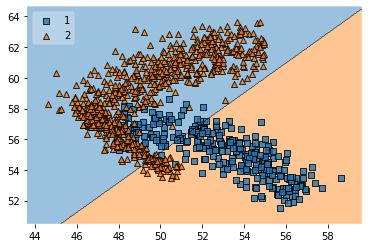

In [49]:
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

From the plot of the decision boundary above, we see that this model could greatly be improved if it had a nonlinear decision boundary. To do this, we will explore a few different kernels to see how they change the decision boundary.

## Kernels

Support Vector Machines (SVMs) are powerful tools for machine learning, and they become even more powerful when a kernel is used to define a more complex decision boundary. The Sklearn library provides a number of kernels that can be used in the SVC model we are using. We will have already seen a linear kernel, so now we will repeate the steps above using the following kernels
1. rbf (default kernel for SVC)
2. poly
3. sigmoid

Each type of kernel has different parameterizations based on its mathematical formulation. Additional information on the kernels used in sklearn can be found at https://scikit-learn.org/stable/modules/svm.html#svm-kernels

### Rbf Kernel
The rbf kernel uses the exponential function
<center> $exp(-\gamma\|X-X'\|)$
    
to measure the distance between the points $X$ and $X'.$ When viewing the decision boundary from the model below, vary the parameter gamma to see how it changes the decision boundary (gamma > 0).

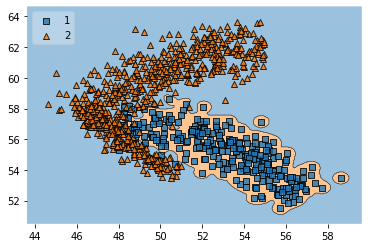

In [55]:
model = svm.SVC(kernel='rbf', gamma = 10)
model.fit(X,Y)
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

### Polynomial Kernel
The polynomial kernel uses the function 
<center>$(\gamma\langle X,X'\rangle+r)^d$
    
to measure the distance between the points $X$ and $X'.$ By default, $d$ will be set to 3, but this can be modified in the parameters of the model. Again, you can vary the parameters to see how it affects the decision boundary ($d$ is given as degree and $r$ is given as coef0).
    
Note: the run time scales with $d$

In [ ]:
model = svm.SVC(kernel='poly', degree = 1, coef0 = 1)
model.fit(X,Y)
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

### Sigmoid Kernel

The sigmoid kernel uses the function
<center>$\tanh(\gamma\langle X,X'\rangle+r)$
    
to measure the distance between the points $X$ and $X'$

In [ ]:
model = svm.SVC(kernel='sigmoid', gamma = 1, coef0 = 1)
model.fit(X,Y)
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

The point of the above code is to give some intuition for how kernels impact a SVM and an understanding how why distance is such an important concept in machine learning. It is important to note that in the above code, we have only use 1 type of machine learning model, but we see that by varying the kernel we apply to the model we get varying results.

Typically, a kernel should NOT be selected by trying to visualize the decision boundary. This is impractical for datasets in higher dimensions, and it would discount the importance of having a validation method. Kernel selection should go through a process similar to the model validation process we have discussed.

## Multiclass Classification with SVMs



In [1]:
print("Hello World")

Hello World


In [3]:
import chord as cd

In [13]:
from chord import Chord

In [14]:
matrix = [[4.4967e+04, 5.8830e+03, 2.7700e+03, 1.4660e+03, 2.8990e+04, 3.0500e+02, 1.0400e+02, 1.4600e+02, 3.6400e+02, 1.0000e+00, 0.0000e+00, 0.0000e+00],
 [5.3500e+02, 6.8000e+01, 6.4000e+01, 9.0000e+00, 4.4840e+03, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 [3.0720e+03, 2.4700e+02, 2.7110e+03, 7.0000e+00, 2.0710e+03, 1.1000e+03, 1.0000e+00, 9.3000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 [5.6800e+02, 1.8000e+01, 7.0000e+00, 1.4453e+04, 1.0336e+04, 2.0000e+00, 2.8000e+02, 1.6000e+01, 2.0400e+02, 0.0000e+00, 0.0000e+00, 1.8000e+01],
 [1.7067e+04, 1.2800e+02, 2.6840e+03, 8.5240e+03, 0.0000e+00, 9.8000e+01, 7.6630e+03, 5.4000e+01, 0.0000e+00, 1.0000e+01, 7.0000e+00, 0.0000e+00],
 [1.0480e+03, 1.0000e+00, 3.6500e+02, 1.0000e+00, 1.0100e+02, 3.8000e+01, 0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 [5.4000e+01, 0.0000e+00, 1.0000e+00, 3.6300e+02, 6.9030e+03, 1.0000e+00, 1.2006e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 [1.5000e+02, 2.2000e+01, 6.6000e+01, 2.1000e+01, 6.0000e+00, 5.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
 [3.7000e+02, 0.0000e+00, 0.0000e+00, 2.2500e+02, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 [2.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 [3.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
 [0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 1.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]

In [15]:
hospitalUnits =  ['UH', 'MSSU', 'CVC', 'MH', 'outside', 'CICU', 'VH', 'ABCC', 'UHS ECT', 'OPERRM-KEC', 'OPERRM-EASC', '10NICU']

In [16]:
Chord(matrix, hospitalUnits).show()

In [21]:
matrix2 = [[1,2,1],[3,0,4],[5,3,1]]
names = ['side 1', 'side 2', 'side 3']
Chord(matrix2, names).show()